In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
kratdata=pd.read_csv('krat_energy.csv',header=None)
kratdata.columns = ['krat_id', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','snakes_in_cell','owls_in_cell']
snakedata=pd.read_csv('snake_energy.csv',header=None)
snakedata.columns = ['snake_id', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','krats_in_cell','owls_in_cell']
#kratdata.sort_values(by=['owls_in_cell'], ascending=False).head(20)
#snakedata.head().sort_values(by=['owls_in_cell'], ascending=False)

In [27]:
## Krat individual check
idoi = 2267458398536
ktemp = kratdata[kratdata['krat_id']==idoi]
#ktemp.head(55)

In [12]:
## snake individual check
idoi = 2125413594440
stemp = snakedata[snakedata['snake_id']==idoi]
#stemp.head(50)

Text(0.5, 1.0, 'Snake Count')

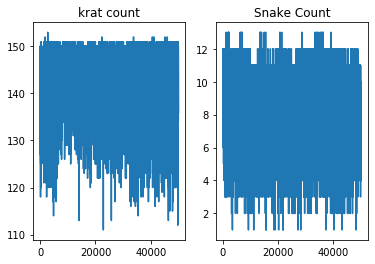

In [2]:
########## Population Counts ###############
df = kratdata[["cycle", "krat_id"]].groupby("cycle").krat_id.nunique()
df = df.reset_index()
df.columns = ['cycle','krats']
df2 = snakedata[["cycle", "snake_id"]].groupby("cycle").snake_id.nunique()
df2 = df2.reset_index()
df2.columns = ['cycle','snakes']


#Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
ax = axs[0]
ax.plot(df['cycle'], df['krats'])
ax.set_title('krat count')

ax = axs[1]
ax.plot(df2['cycle'], df2['snakes'])
ax.set_title('Snake Count')

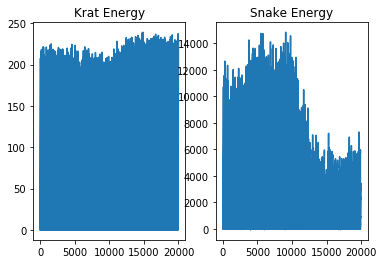

In [87]:
########## Population energy ###############
df = kratdata[["cycle", "energy_score"]].groupby("cycle").mean()
df = df.reset_index()
df.columns = ['cycle','energy_score']
df2 = snakedata[["cycle", "energy_score"]].groupby("cycle").mean()
df2 = df2.reset_index()
df2.columns = ['cycle','energy_score']


#Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
ax = axs[1]
ax.plot(df2['cycle'], df2['energy_score'])
ax.set_title('Snake Energy')


ax = axs[0]
ax.plot(df['cycle'], df['energy_score'])
ax.set_title('Krat Energy')
plt.show()

['Open Pure', 'mixed 0.05', 'mixed 0.1', 'mixed 0.15', 'mixed 0.2', 'mixed 0.25', 'mixed 0.3', 'mixed 0.35', 'mixed 0.4', 'mixed 0.45', 'mixed 0.5', 'mixed 0.55', 'mixed 0.6', 'mixed 0.65', 'mixed 0.7', 'mixed 0.75', 'mixed 0.8', 'mixed 0.85', 'mixed 0.9', 'mixed 0.95', 'Bush Pure']


C:\Users\micha\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


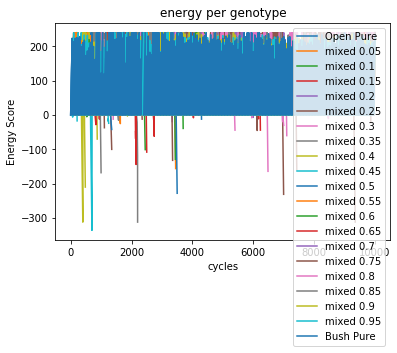

In [39]:
df = kratdata.groupby(["cycle", "bush_pw"]).agg({"energy_score": ['mean']}).reset_index()
df = df.pivot(index="cycle", columns="bush_pw")
df = df.reset_index()
col_name = []
for i in df.columns:
    label = ''
    if i[2] == 1:
        label = 'Bush Pure'
    elif i[2] == 0:
        label = 'Open Pure'
    elif i[0] == 'cycle':
        label = 'cycle'
    else:
        label = 'mixed {}'.format(i[2])
    col_name.append(label)
df.columns = col_name

cols = list(filter(lambda x: x!='cycle' , list(df)))
plt.figure()
for i in cols:
    plt.plot(df['cycle'], df[i], label = i)


plt.xlabel("cycles")
plt.ylabel("Energy Score")
plt.title("energy per genotype")
plt.legend()

plt.show()

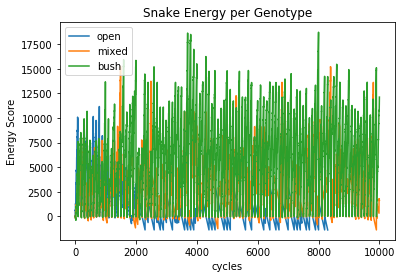

In [40]:
df = snakedata.groupby(["cycle", "bush_pw"]).agg({"energy_score": ['mean']}).reset_index()
df = df.pivot(index="cycle", columns="bush_pw").reset_index()
df.columns = ["cycle","open","mixed","bush"]
plt.figure()
plt.plot(df['cycle'], df['open'], label = 'open')
plt.plot(df['cycle'], df['mixed'], label = 'mixed')
plt.plot(df['cycle'], df['bush'], label = 'bush')
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("cycles")
plt.ylabel("Energy Score")
plt.title("Snake Energy per Genotype")
plt.legend()

plt.show()

In [54]:

#purple = [128,0,128]
#blue = [0,0,255]
#red = [255,0,0]



[265, 0, 0]


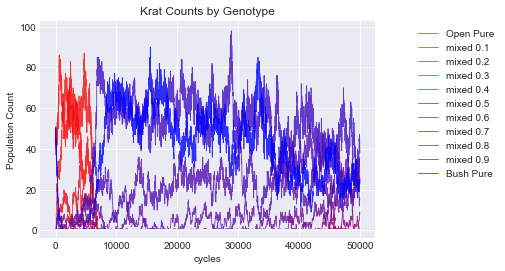

In [22]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

df = kratdata.groupby(["cycle", "bush_pw"]).krat_id.nunique()
df = df.reset_index()
df.columns = ['cycle','bush_pw', "Pop Count"]
df = df.pivot(index="cycle", columns="bush_pw").reset_index()
df.columns
col_name = []
color_dict = {}
color_change = 15

blue_counter = 1
red_counter = 1
rand_counter = 1
for i in df.columns:
    label = ''
    if i[1] == 1:
        label = 'Bush Pure'
        if label not in color_dict:
            color_dict[label] = (0,0,255)
    elif i[1] == 0:
        label = 'Open Pure'
        if label not in color_dict:
            color_dict[label] = (255,0,0)
    elif i[0] == 'cycle':
        label = 'cycle'
    else:
        label = 'mixed {}'.format(i[1])
        if i[1] < 0.5:
            if label not in color_dict:
                red = 255 - color_change*red_counter
                blue = 0 + color_change*red_counter
                color_dict[label] = (red,15,blue)
                red_counter += 1
        elif i[1] > 0.5:
            if label not in color_dict:
                red = 125 - color_change*blue_counter
                blue = 135 + color_change*blue_counter
                color_dict[label] = (red,15,blue)
                blue_counter += 1
        elif i[1] == 0.5:
            if label not in color_dict:
                color_dict[label] = (128,0,128)  
    col_name.append(label)
    
df.columns = col_name

cols = list(filter(lambda x: x!='cycle' , list(df)))

#
# style
plt.style.use('seaborn-darkgrid')

plt.figure()
for i in cols:
    plt.plot(df['cycle'], df[i],rgb_to_hex(color_dict[i]), linewidth=.8, alpha=0.8, label = i)

plt.xlabel("cycles")
plt.ylabel("Population Count")
plt.title("Krat Counts by Genotype")
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left')

plt.show()

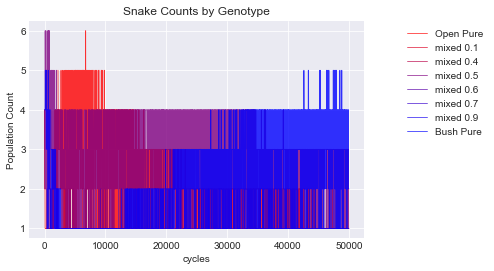

In [24]:
df = snakedata.groupby(["cycle", "bush_pw"]).snake_id.nunique()
df = df.reset_index()
df = df.pivot(index="cycle", columns="bush_pw").reset_index()
df.columns
col_name = []
color_dict = {}
color_change = 35

blue_counter = 1
red_counter = 1
for i in df.columns:
    label = ''
    if i[1] == 1:
        label = 'Bush Pure'
        if label not in color_dict:
            color_dict[label] = (0,0,255)
    elif i[1] == 0:
        label = 'Open Pure'
        if label not in color_dict:
            color_dict[label] = (255,0,0)
    elif i[0] == 'cycle':
        label = 'cycle'
    else:
        label = 'mixed {}'.format(i[1])
        if i[1] < 0.5:
            if label not in color_dict:
                red = 255 - color_change*red_counter
                blue = 0 + color_change*red_counter
                color_dict[label] = (red,0,blue)
                red_counter += 1
        elif i[1] > 0.5:
            if label not in color_dict:
                red = 125 - color_change*blue_counter
                blue = 135 + color_change*blue_counter
                color_dict[label] = (red,0,blue)
                blue_counter += 1
        elif i[1] == 0.5:
            if label not in color_dict:
                color_dict[label] = (128,0,128)  
    col_name.append(label)
    
df.columns = col_name

cols = list(filter(lambda x: x!='cycle' , list(df)))

#
plt.figure()
for i in cols:
    plt.plot(df['cycle'], df[i],rgb_to_hex(color_dict[i]), linewidth=.8, alpha=0.8,  label = i)

plt.xlabel("cycles")
plt.ylabel("Population Count")
plt.title("Snake Counts by Genotype")
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left')

plt.show()

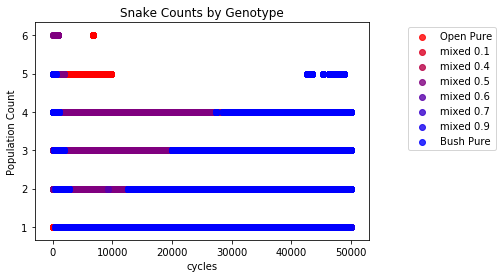

In [11]:
df = snakedata.groupby(["cycle", "bush_pw"]).snake_id.nunique()
df = df.reset_index()
df = df.pivot(index="cycle", columns="bush_pw").reset_index()
df.columns
col_name = []
color_dict = {}
color_change = 35

blue_counter = 1
red_counter = 1
for i in df.columns:
    label = ''
    if i[1] == 1:
        label = 'Bush Pure'
        if label not in color_dict:
            color_dict[label] = (0,0,255)
    elif i[1] == 0:
        label = 'Open Pure'
        if label not in color_dict:
            color_dict[label] = (255,0,0)
    elif i[0] == 'cycle':
        label = 'cycle'
    else:
        label = 'mixed {}'.format(i[1])
        if i[1] < 0.5:
            if label not in color_dict:
                red = 255 - color_change*red_counter
                blue = 0 + color_change*red_counter
                color_dict[label] = (red,0,blue)
                red_counter += 1
        elif i[1] > 0.5:
            if label not in color_dict:
                red = 125 - color_change*blue_counter
                blue = 135 + color_change*blue_counter
                color_dict[label] = (red,0,blue)
                blue_counter += 1
        elif i[1] == 0.5:
            if label not in color_dict:
                color_dict[label] = (128,0,128)  
    col_name.append(label)
    
df.columns = col_name

cols = list(filter(lambda x: x!='cycle' , list(df)))

#
plt.figure()
for i in cols:
    plt.scatter(df['cycle'], df[i],color =rgb_to_hex(color_dict[i]), alpha=0.8 , label = i)

plt.xlabel("cycles")
plt.ylabel("Population Count")
plt.title("Snake Counts by Genotype")
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left')

plt.show()

In [12]:
nums = [1,-3,-9,5]
list_length = len(nums)
i=0
value_above_10 = False
while i < list_length:
    if abs(nums[i]) > 10:
        value_above_10 = True
    i += 1

        
print(value_above_10)

False


In [6]:
###### Old script for code ref #################


data_initial_time= data['time']== min(data['time'])
data_initial_time = data[data_initial_time]
initial_time = data_initial_time['time'].max()
initial_krat_pop = data_initial_time['krat_pop'].sum()
initial_snake_pop = data_initial_time['snake_pop'].sum()
prompt = 'time: {},  Krats {}, Snakes {}'.format(initial_time,initial_krat_pop,initial_snake_pop)
cells = data['cell_id'].unique()
print('Number Of Cells: {}'.format(len(cells)))
print('Initial Stats')
print(prompt)

data_final_time= data['time']== max(data['time'])
data_final_time = data[data_final_time]
final_time = data_final_time['time'].max()
final_krat_pop = data_final_time['krat_pop'].sum()
final_snake_pop = data_final_time['snake_pop'].sum()
prompt = 'time: {}, Krats {}, Snakes {}'.format(final_time,final_krat_pop,final_snake_pop)
print('Final Stats')
print(prompt)


Number Of Cells: 2500
Initial Stats
time: 0,  Krats 100, Snakes 8
Final Stats
time: 8748, Krats 100, Snakes 8


100.0


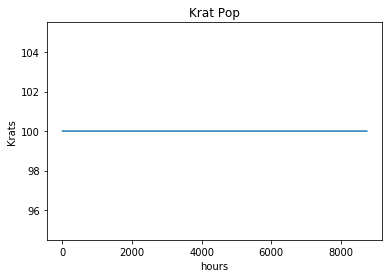

In [7]:
import matplotlib.pyplot as plt
import numpy as np

df = data[["time", "krat_pop"]].groupby("time").sum()
ytemp = list(df.stack())
y = [float(y) for y in ytemp]
xtemp= list(df.index)
x = xtemp[0:len(y)]
print(min(y))

plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Krats")
plt.title("Krat Pop")

plt.show()

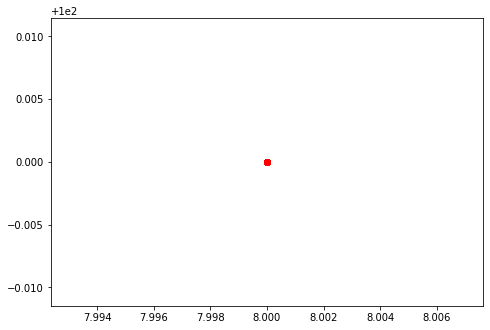

In [8]:
import matplotlib.pyplot as plt
import numpy as np

df = data[["time", "krat_pop","snake_pop"]].groupby("time").sum()
df = df.reset_index()
x = df['snake_pop']
y = df['krat_pop']
#ytemp = list(df.stack())
#y = [float(y) for y in ytemp]
#xtemp= list(df.index)
#x = xtemp[0:len(y)]
#print(min(y))
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x, y, color='r')

#plt.xlabel("hours")
#plt.ylabel("Krats")
#plt.title("Krat Pop")

plt.show()

Krat
Percent of Time in Bush
0.5266392694063927


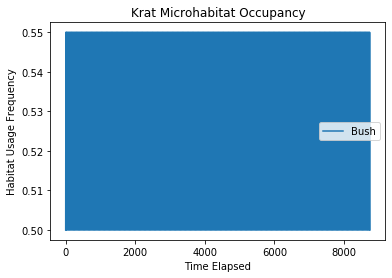

In [9]:
df = data.groupby(["time","habitat_type"]).agg({'krat_pop': ['sum']}).reset_index()
df.columns = ['time','habitat_type','krat_pop']
df = df.pivot(index='time', columns='habitat_type', values='krat_pop').reset_index()
print('Krat')
print('Percent of Time in Bush')
print(df['BUSH'].sum()/(df['BUSH'].sum()+df['OPEN'].sum()))
df['BUSH_OCC'] = df['BUSH']/(df['BUSH']+df['OPEN'])
df['OPEN_OCC'] = df['OPEN']/(df['BUSH']+df['OPEN'])
df= df[['time','BUSH_OCC','OPEN_OCC']]
# line 1 points

# plotting the line 1 points 
plt.plot(df['time'], df['BUSH_OCC'], label = "Bush")
# line 2 points

#plt.plot(df['time'], df['OPEN_OCC'], label = "Open")
plt.xlabel('Time Elapsed')
# Set the y axis label of the current axis.
plt.ylabel('Habitat Usage Frequency')
# Set a title of the current axes.
plt.title('Krat Microhabitat Occupancy')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#add moc if no kangaroo rats in the cell

Snake
Proportion of Time in Bush
0.015525114155251141


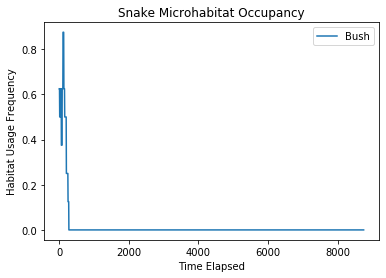

In [11]:
df = data.groupby(["time","habitat_type"]).agg({'snake_pop': ['sum']}).reset_index()
df.columns = ['time','habitat_type','snake_pop']
df = df.pivot(index='time', columns='habitat_type', values='snake_pop').reset_index()
print('Snake')
print('Proportion of Time in Bush')
print(df['BUSH'].sum()/(df['BUSH'].sum()+df['OPEN'].sum()))
df['BUSH_OCC'] = df['BUSH']/(df['BUSH']+df['OPEN'])
df['OPEN_OCC'] = df['OPEN']/(df['BUSH']+df['OPEN'])
df= df[['time','BUSH_OCC','OPEN_OCC']]
# line 1 points

# plotting the line 1 points 
plt.plot(df['time'], df['BUSH_OCC'], label = "Bush")
# line 2 points

#plt.plot(df['time'], df['OPEN_OCC'], label = "Open")
plt.xlabel('Time Elapsed')
# Set the y axis label of the current axis.
plt.ylabel('Habitat Usage Frequency')
# Set a title of the current axes.
plt.title('Snake Microhabitat Occupancy')
# show a legend on the plot
plt.legend()
# Display a figure.

plt.show()

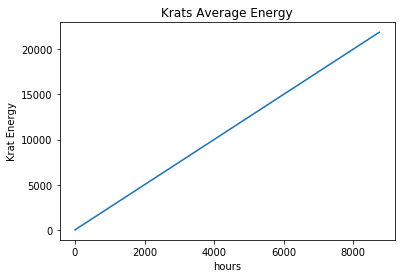

In [12]:
df = pd.DataFrame(data[["time","krat_pop", "krat_energy"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_krat_energy'] = df['krat_energy']/df['krat_pop']
ytemp = list(df['average_krat_energy'])
#if y>0
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Krat Energy")
plt.title("Krats Average Energy")

plt.show()

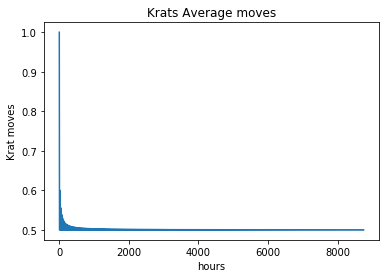

In [13]:
df = pd.DataFrame(data[["time","krat_pop", "krat_movement"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_krat_movment'] = (df['krat_movement']/df['krat_pop'])/df['time']
ytemp = list(df['average_krat_movment'])
#if y>0
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Krat moves")
plt.title("Krats Average moves")

plt.show()

8.0


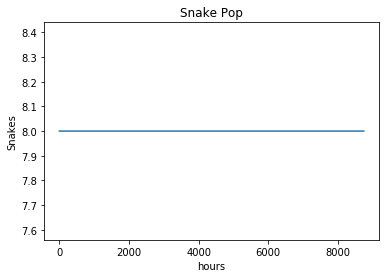

In [14]:
import matplotlib.pyplot as plt
import numpy as np

df = data[["time", "snake_pop"]].groupby("time").sum()
ytemp = list(df.stack())
y = [float(y) for y in ytemp]
xtemp= list(df.index)
#xtemp = list(df['time_of_day'])
x = xtemp[0:len(y)]
print(min(y))


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Snakes")
plt.title("Snake Pop")

plt.show()

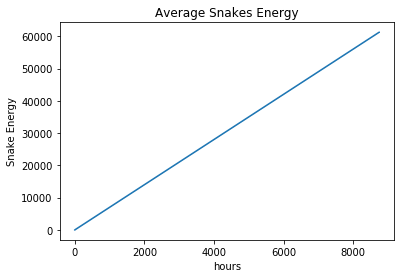

In [15]:
df = pd.DataFrame(data[["time","snake_pop", "snake_energy"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_snake_energy'] = df['snake_energy']/df['snake_pop']
ytemp = list(df['average_snake_energy'])
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Snake Energy")
plt.title("Average Snakes Energy")

plt.show()

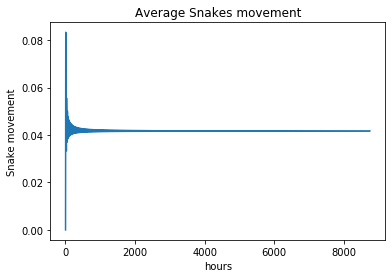

In [16]:
df = pd.DataFrame(data[["time","snake_pop", "snake_movement"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_snake_movement'] = (df['snake_movement']/df['snake_pop'])/df['time']
ytemp = list(df['average_snake_movement'])
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Snake movement")
plt.title("Average Snakes movement")

plt.show()

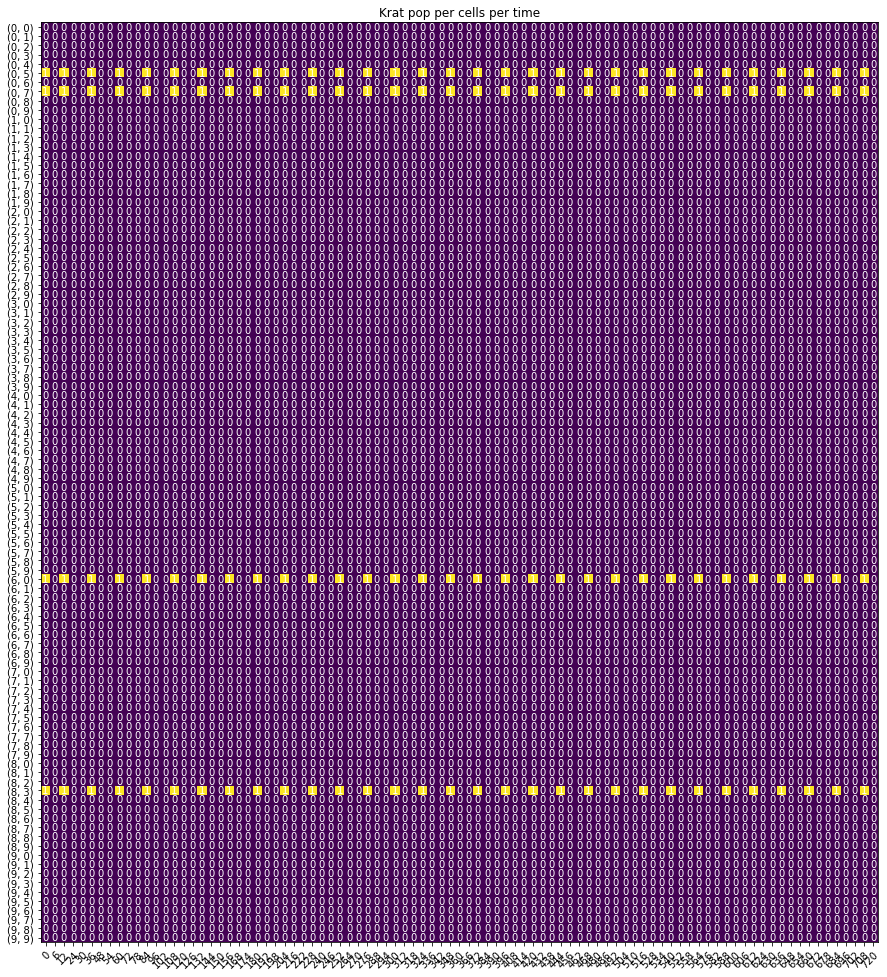

In [17]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

df = data[['time','cell_id','krat_pop']]

def cell_id_analysis(width,length):
    cell_ids = []
    for x in range(width+1):
        for y in range(length+1):
            cell_id = (x,y)
            cell_ids.append(cell_id)
    return cell_ids

cell_ids =  cell_id_analysis(9,9)
cell_ids = [str(cell_id) for cell_id in cell_ids]
df =df[df['time'] <= 720]
df =df[df.cell_id.isin(cell_ids)]
newdf = df.pivot(index='cell_id', columns='time', values='krat_pop')
time = df['time'].unique()
info = np.array(newdf)
newdf.reset_index(inplace=True)
m = pd.DataFrame(newdf)
cells = m['cell_id'].unique()

fig, ax = plt.subplots(figsize=(15,30))
im = ax.imshow(info)

# We want to show all ticks...
ax.set_xticks(np.arange(len(time)))
ax.set_yticks(np.arange(len(cells)))
# ... and label them with the respective list entries
ax.set_xticklabels(time)
ax.set_yticklabels(cells)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cells)):
    for j in range(len(time)):
        text = ax.text(j, i, int(info[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Krat pop per cells per time")
#fig.tight_layout()
plt.show()

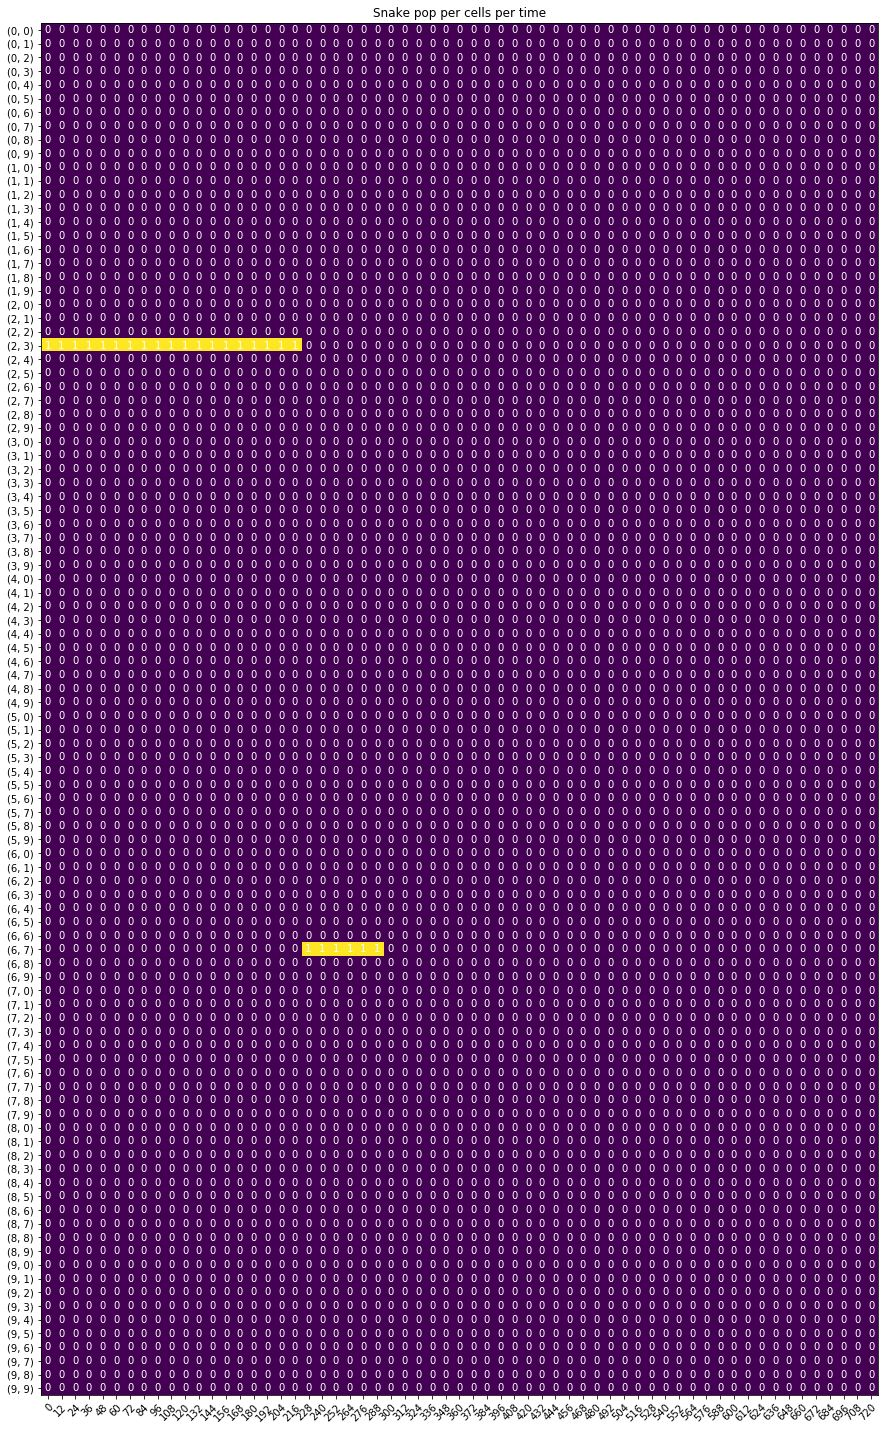

In [13]:

df = data[['time','cell_id','snake_pop']]
cell_ids =  cell_id_analysis(9,9)
cell_ids = [str(cell_id) for cell_id in cell_ids]
df =df[df['time'] <= 720]
df =df[df.cell_id.isin(cell_ids)]
newdf = df.pivot(index='cell_id', columns='time', values='snake_pop').fillna(0)
time = df['time'].unique()
info = np.array(newdf)
newdf.reset_index(inplace=True)
m = pd.DataFrame(newdf)
cells = m['cell_id'].unique()

fig, ax = plt.subplots(figsize=(15,30))
im = ax.imshow(info)

# We want to show all ticks...
ax.set_xticks(np.arange(len(time)))
ax.set_yticks(np.arange(len(cells)))
# ... and label them with the respective list entries
ax.set_xticklabels(time)
ax.set_yticklabels(cells)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cells)):
    for j in range(len(time)):
        text = ax.text(j, i, int(info[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Snake pop per cells per time")
#fig.tight_layout()
plt.show()

In [2]:
import math
def probability_time_step_adjustment(probability_success,time_step,number_of_successes):
    p = probability_success
    q = 1-probability_success
    cn = math.factorial(int(time_step))/(math.factorial(int(time_step - number_of_successes))*math.factorial(int(number_of_successes)))
    prob = cn*p**(number_of_successes)*q**(time_step - number_of_successes)
    return prob


prob_of_success = (7/32)
time_step = 6
for i in range(time_step):
    new_prob =  probability_time_step_adjustment(probability_success = prob_of_success ,time_step = time_step,number_of_successes = i)
    print('i: {}, new prob: {}'.format(i,new_prob))

i: 0, new prob: 0.22737367544323206
i: 1, new prob: 0.38198777474462986
i: 2, new prob: 0.2673914423212409
i: 3, new prob: 0.0998261384665966
i: 4, new prob: 0.020963489077985287
i: 5, new prob: 0.002347910776734352
